In [12]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Read Dataset
df=pd.read_csv(r'C:\Users\Rahul\Documents\healthcare_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [7]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [9]:
# Average age of the patient
average_age = df['Age'].mean()
print(f"The average age of the patient is {average_age:.2f} years.")

The average age of the patient is 51.54 years.


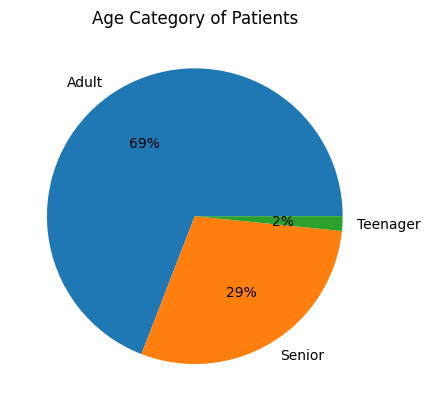

In [22]:
# age category of the patients 
def age_category(Age):
    if Age >0 and Age <=12:
        return "Child"
    elif Age > 12 and Age <= 18:
        return "Teenager"
    elif Age > 18 and Age <= 65:
        return "Adult"
    else:
        return "Senior"
    
df['Patient Category']=df['Age'].apply(age_category)

category_count=df['Patient Category'].value_counts()

plt.pie(category_count,labels=category_count.index,autopct='%.f%%')
plt.title('Age Category of Patients')
plt.show()

In [26]:
# Define age brackets
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count the number of patients in each age group
age_group_distribution = df['Age Group'].value_counts().sort_index()

print("Patient Distribution Across Age Groups:")
print(age_group_distribution)


Patient Distribution Across Age Groups:
Age Group
0-20      1693
21-40    16179
41-60    16480
61-80    16249
81+       4899
Name: count, dtype: int64


In [28]:
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [30]:
df.groupby('Gender')['Age'].mean()

Gender
Female    51.578735
Male      51.500252
Name: Age, dtype: float64

Age Distribution by Gender:
Gender  Age Group
Female  0-20          865
        21-40        8091
        41-60        8165
        61-80        8108
        81+          2497
Male    0-20          828
        21-40        8088
        41-60        8315
        61-80        8141
        81+          2402
dtype: int64


C:\Users\Rahul\AppData\Local\Temp\ipykernel_12440\1302350385.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_distribution = df.groupby(['Gender', 'Age Group']).size()


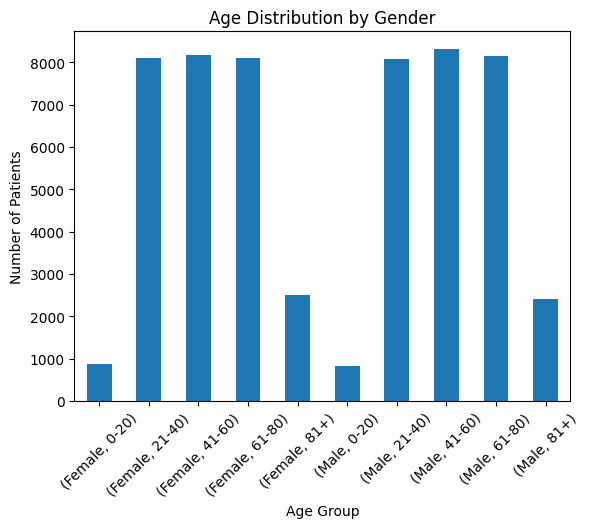

In [33]:
gender_age_distribution = df.groupby(['Gender', 'Age Group']).size()

print("Age Distribution by Gender:")
print(gender_age_distribution)

# Plot the distribution as a bar plot
gender_age_distribution.plot(kind='bar')
plt.title('Age Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

In [43]:
# count the number of patient with each blood type
blood_type_distribution=df['Blood Type'].value_counts()
print("Distribution of Blood Types:")
print(blood_type_distribution)

Distribution of Blood Types:
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64


In [45]:
# most common blood type 
most_common_blood_type = df['Blood Type'].mode()[0]
most_common_count = blood_type_distribution[most_common_blood_type]

print(f"The most common blood type is '{most_common_blood_type}' with {most_common_count} patients.")

The most common blood type is 'A-' with 6969 patients.


In [51]:
blood_type_gender_distribution=df.groupby('Gender')['Blood Type'].value_counts()
print(blood_type_gender_distribution)

Gender  Blood Type
Female  A+            3564
        O-            3512
        O+            3464
        AB-           3461
        B-            3461
        A-            3449
        AB+           3438
        B+            3377
Male    B+            3568
        A-            3520
        AB+           3509
        AB-           3484
        B-            3483
        O+            3453
        A+            3392
        O-            3365
Name: count, dtype: int64


In [56]:
blood_type_age_distribution = df.groupby(['Age Group', 'Blood Type']).size().unstack(fill_value=0)

print("Distribution of Blood Types by Age Group:")
print(blood_type_age_distribution)

Distribution of Blood Types by Age Group:
Blood Type    A+    A-   AB+   AB-    B+    B-    O+    O-
Age Group                                                 
0-20         209   212   222   218   196   224   189   223
21-40       2043  2059  2007  2042  1956  2055  2013  2004
41-60       2030  2037  2100  2004  2082  2053  2135  2039
61-80       2052  2080  2019  2068  2090  1985  1964  1991
81+          622   581   599   613   621   627   616   620


C:\Users\Rahul\AppData\Local\Temp\ipykernel_12440\215962605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blood_type_age_distribution = df.groupby(['Age Group', 'Blood Type']).size().unstack(fill_value=0)


In [57]:
blood_type_medical_condition_distribution = df.groupby(['Medical Condition', 'Blood Type']).size().unstack(fill_value=0)

print("Blood Type Distribution by Medical Condition:")
print(blood_type_medical_condition_distribution)



Blood Type Distribution by Medical Condition:
Blood Type           A+    A-   AB+   AB-    B+    B-    O+    O-
Medical Condition                                                
Arthritis          1116  1153  1130  1192  1201  1169  1198  1149
Asthma             1135  1173  1189  1134  1108  1119  1173  1154
Cancer             1185  1134  1112  1198  1196  1144  1108  1150
Diabetes           1213  1167  1173  1139  1188  1151  1151  1122
Hypertension       1128  1199  1215  1125  1103  1173  1157  1145
Obesity            1179  1143  1128  1157  1149  1188  1130  1157


In [58]:
df.to_csv('Healthcare.csv',index=False)